# Model Evaluation Exercise

## Regression evaluation

In [1]:
# import numpy
import numpy as np

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_features=10, n_samples=1000, noise=10)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [3]:
from sklearn.linear_model import LinearRegression, Ridge

In [4]:
# creating linear regression
lr = LinearRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [5]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

_________________________
## Mean Absolute Error (MAE)


**Write the definition to the mean absolute error (MAE) below and how to interpret it?**
> *The MAE refers too....*

* import **mean_absolute_error** from sklearn

In [7]:
from sklearn.metrics import mean_absolute_error

* compute MAE

In [8]:
print('MAE for Linear regression: ',mean_absolute_error(y, y_lr))
print('MAE for Ridge regression: ',mean_absolute_error(y, y_rr))

MAE for Linear regression:  7.88466442569961
MAE for Ridge regression:  7.885006688813666


* According to MAE, what is the better model?

About the same

____________________________________
## R2 - Coefficient of Determination

**Write the definition to the R2 score below and how to interpret it?**
> *The R2 refers to the amount of variance in Y explained by X.

* import **r2_score** from sklearn

In [9]:
from sklearn.metrics import r2_score

* compute R2

In [13]:
r2_lin=r2_score(y, y_lr)
r2_rr=r2_score(y, y_rr)
print(r2_lin)
print(r2_rr)


0.9971031317568194
0.9971031224902891


* According to R2, what is the better model?

Linear

* (Stretch) use predictions from linear regression and compute adjusted R2

In [14]:
Adj_r2_lin = 1-(1-r2_lin)*(1000-1)/(1000-10-1) #formula: Adj r2 = 1-(1-R2)*(n-1)/(n-p-1) p: no. of vars., n: sample size

In [15]:
Adj_r2_rr = 1-(1-r2_rr)*(1000-1)/(1000-10-1)

In [16]:
print(Adj_r2_lin)
print(Adj_r2_rr)

0.9970738408746841
0.9970738315144578


________________________________
## Classification evaluation

In [17]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [18]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [19]:
# creating linear regression
lr = LogisticRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [20]:
# creating ridge regression
rr = RidgeClassifier(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

## Precision score

**Write the definition to the Precision score below and how to interpret it?**
> *The Precision score refers to the fraction of correctly identified as positive out of all predicted as positives.

* import **precision_score** from sklearn

In [21]:
from sklearn.metrics import precision_score

* compute precision

In [23]:
pre_lr=precision_score(y, y_lr)
pre_rr=precision_score(y, y_rr)

* print precision

In [24]:
print(pre_lr)
print(pre_rr)

0.8941176470588236
0.8835877862595419


## Recall score

**Write the definition to the Recall score below and how to interpret it?**
> *The Recall score refers to the fraction you correctly identified as positive out of all positives.*

* import **recal_score** from sklearn

In [25]:
from sklearn.metrics import recall_score

* compute recall

In [26]:
rec_lr=recall_score(y,y_lr)
rec_rr=recall_score(y,y_rr)

* print recall

In [27]:
print(rec_lr)
print(rec_rr)

0.9083665338645418
0.9223107569721115


## ROC curve

**What is the ROC curve? How do you interpret it?**
> *The ROC curve plots the FPR vs. TPR for each possible threshold*

* import **roc_curve** from sklearn

In [28]:
from sklearn.metrics import roc_curve

* compute and store ROC curve values in fpr, tpr, thresholds variables

In [36]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y, y_lr)
fpr_rr, tpr_rr, thresholds_rr = roc_curve(y, y_rr)
print(fpr_lr, tpr_lr)

[0.         0.10843373 1.        ] [0.         0.90836653 1.        ]


In [33]:
from sklearn.metrics import auc
roc_auc_lr=auc(fpr_lr,tpr_lr)


In [42]:
roc_auc_rr=auc(fpr_rr,tpr_rr)

In [37]:
print(roc_auc_lr)

0.8999663994623914


* import matplotlib 

In [31]:

import matplotlib.pyplot as plt

* plot ROC

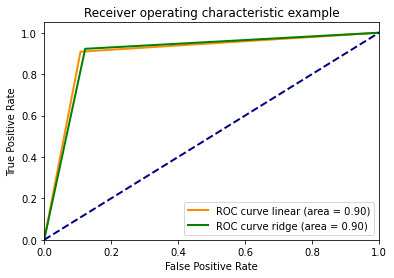

In [46]:
plt.figure()
lw = 2
plt.plot(
    fpr_lr,
    tpr_lr,
    color="darkorange",
    lw=lw,
    label="ROC curve linear (area = %0.2f)" % roc_auc_lr,
)
plt.plot(
    fpr_rr,
    tpr_rr,
    color="green",
    lw=lw,
    label="ROC curve ridge (area = %0.2f)" % roc_auc_rr,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers to negative log-likelihood of a logistic model. What log-loss score is to a classification problem, mean squared error (MSE) is to a regression problem. Both the metrics indicate how good or bad the prediction results are by denoting how far the predictions are from the actual values. (should be lower)*

* import **log_loss** from sklearn

In [47]:
from sklearn.metrics import log_loss

* compute log_loss

In [48]:
ll_lr=log_loss(y,y_lr)
ll_rr=log_loss(y,y_rr)

* print log_loss

In [49]:
print(ll_lr)
print(ll_rr)

3.4539208177522998
3.453926414934311


#### Q: According to metrics above, which one is the better model?

Linear regression is better